In [13]:
import serial
import json
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [14]:
ser = serial.Serial("COM6", 9600)

In [15]:
data_points = 150
humidity_data = []

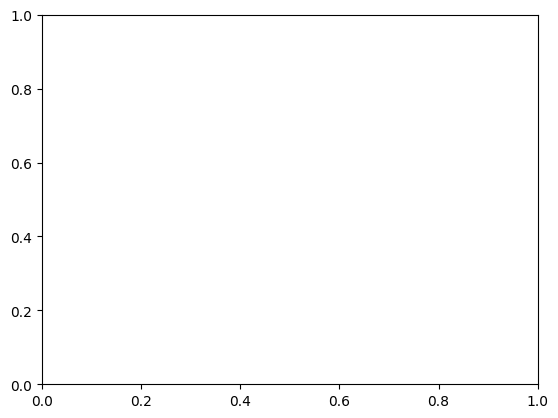

In [16]:
plt.ion()
fig, ax = plt.subplots();

Datos capturados: 149


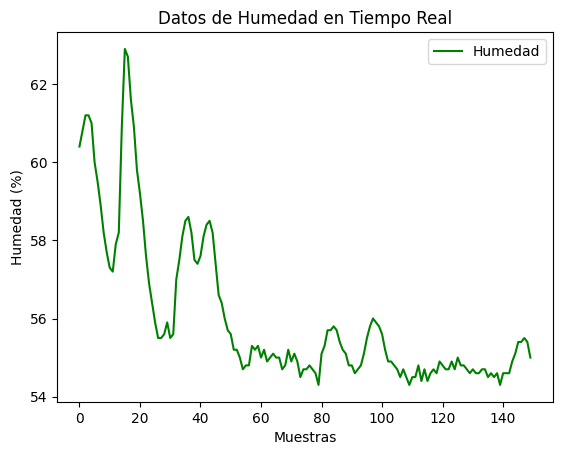

In [17]:
for _ in range(data_points):
    lectura = ""
    
    while True:
        char = ser.read().decode()
        lectura += char
        if char == '\n':
            break
    
    print(f"Datos capturados: {len(humidity_data)}")
    
    read_array = json.loads(lectura)

    if read_array:
        humidity_data.append(read_array[0])
    
        ax.clear()
        ax.plot(humidity_data, label="Humedad", color='green')
        ax.set_title("Datos de Humedad en Tiempo Real")
        ax.set_xlabel("Muestras")
        ax.set_ylabel("Humedad (%)")
        ax.legend()
    
        plt.pause(0.1)
        display(fig)
        clear_output(wait=True)

In [18]:
ser.close()